In [1]:
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [5]:
with open("data_batch_1", "rb") as f:
    batch = pickle.load(f, encoding='bytes')

In [9]:
X = batch[b'data']
y = np.array(batch[b'labels'])

In [11]:
X_images = X.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1).astype("float32") / 255.0

In [13]:
label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']



In [15]:
num_classes = 10
y_cat = tf.keras.utils.to_categorical(y, num_classes = num_classes)

In [17]:
X_train, y_train = X_images[:4000], y_cat[:4000]
X_test, y_test = X_images[4000:5000], y_cat[4000:5000]


print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)


Train set: (4000, 32, 32, 3) (4000, 10)
Test set: (1000, 32, 32, 3) (1000, 10)


In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


C:\Users\vaishnavi\anaconda3\envs\tensorflow_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer ='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.2215 - loss: 2.1060 - val_accuracy: 0.3450 - val_loss: 1.8238
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3640 - loss: 1.7430 - val_accuracy: 0.3510 - val_loss: 1.8060
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4035 - loss: 1.6324 - val_accuracy: 0.4350 - val_loss: 1.5846
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4700 - loss: 1.4717 - val_accuracy: 0.4630 - val_loss: 1.5516
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4807 - loss: 1.4031 - val_accuracy: 0.4920 - val_loss: 1.4327
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5343 - loss: 1.3048 - val_accuracy: 0.4890 - val_loss: 1.4577
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5738 - loss: 1.2028 - val_accuracy: 0.5120 - val_loss: 1.3808
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5970 - loss: 1.1271 - val_accuracy: 0.5300 - v

In [27]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\n Training Accuracy: {train_acc:.4f}, Loss: {train_loss:.4f}")
print(f" Testing Accuracy: {test_acc:.4f}, Loss: {test_loss:.4f}")



 Training Accuracy: 0.6545, Loss: 0.9814
 Testing Accuracy: 0.5230, Loss: 1.4686


In [29]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


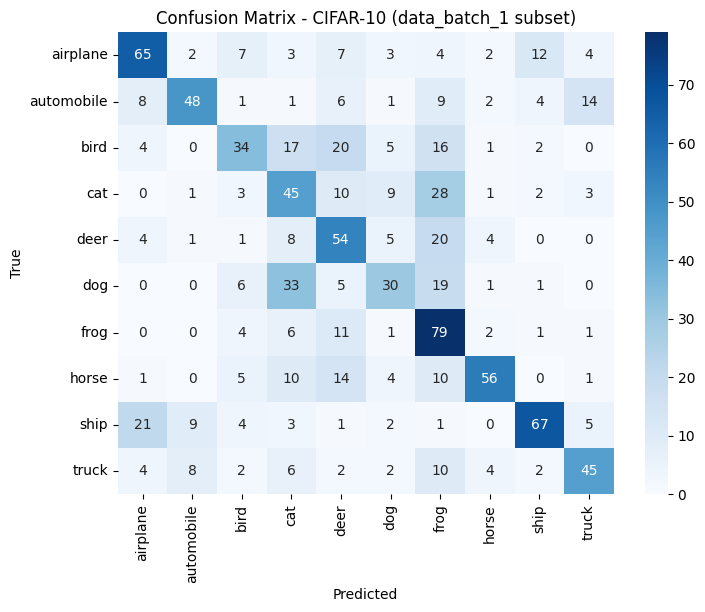

In [31]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix - CIFAR-10 (data_batch_1 subset)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()